# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [1]:
# Package imports for data science
import numpy as np
import scipy.stats as stats
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

In [5]:
ap = pd.read_csv('../data/android_persistence_cpu.csv', sep=";")
ap.PersistenceType = ap.PersistenceType.astype('category')
ap.DataSize = ap.DataSize.astype('category') 
ap.head()

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


<Axes: xlabel='PersistenceType', ylabel='count'>

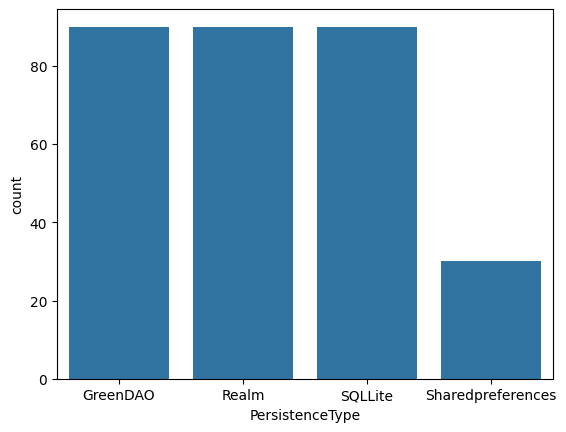

In [62]:
sns.countplot(data = ap, x = "PersistenceType")

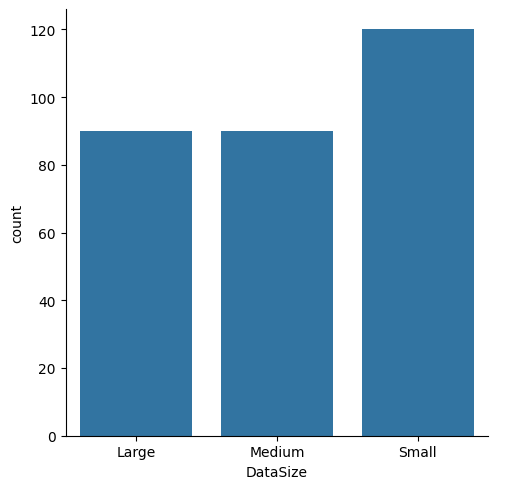

In [63]:
sns.catplot(data = ap,kind="count", x = "DataSize")

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

<Axes: xlabel='PersistenceType', ylabel='count'>

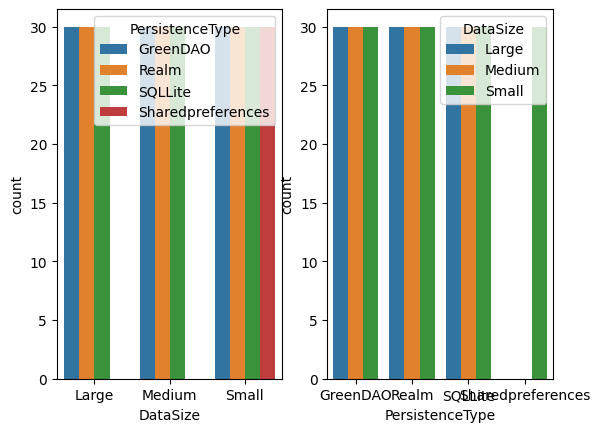

In [65]:
fig, axs = plt.subplots(ncols=2)

sns.countplot(data = ap, x = "DataSize",hue='PersistenceType',  ax = axs[0])

sns.countplot(data = ap, x = "PersistenceType",hue='DataSize',  ax = axs[1])

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time', ylabel='DataSize'>

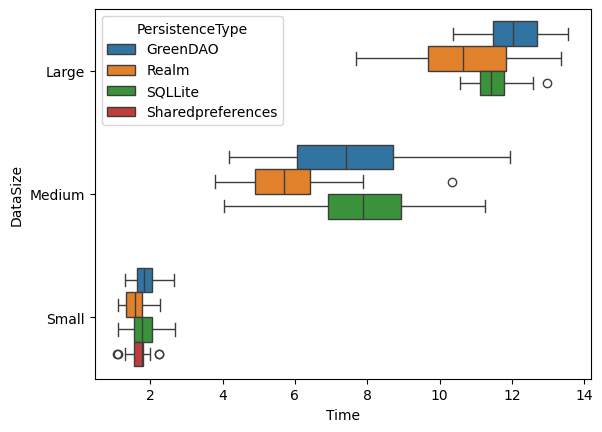

In [28]:
sns.boxplot(ap, x="Time", y="DataSize", hue="PersistenceType")

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

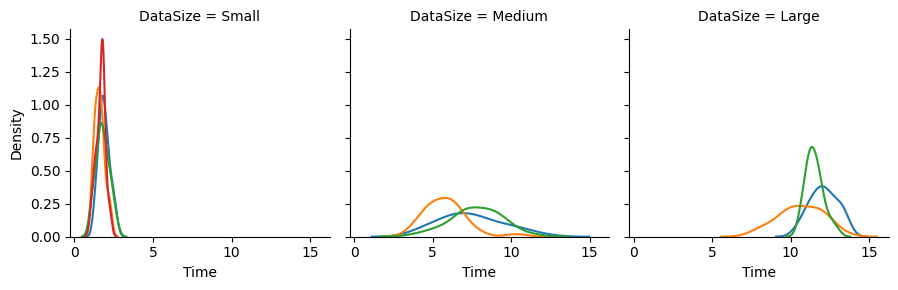

In [44]:
sns.FacetGrid(ap, col="DataSize", hue="PersistenceType", col_order=["Small", "Medium","Large"]).map(sns.kdeplot, "Time")

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [68]:
starstring = "*" * 15
print(f"{starstring} Whole Dataset {starstring}")
print(f"Mean: {ap.Time.mean()}, STD: {ap.Time.std()}")
#ChatGPT antw hieronder
print(f"{starstring} According to DataSize {starstring}")
by_datasize = ap.groupby('DataSize')['Time'].agg(['mean', 'std'])
print(by_datasize)
print(f"{starstring} According to PersistenceType {starstring}")
by_persistence = ap.groupby('PersistenceType')['Time'].agg(['mean', 'std'])
print(by_persistence)
print(f"{starstring} According to Both {starstring}")
by_both = ap.groupby(['DataSize', 'PersistenceType'])['Time'].agg(['mean', 'std'])
print(by_both)

# *************** OPL van https://github.com/JasperLefever/dsai-oef/blob/main/2-analysis-1-var/lab-2-02.ipynb
# Across the whole dataset
ap.Time.mean()
# Broken down according to `DataSize`
ap.groupby('DataSize').Time.mean()
# Broken down according to `PersistenceType`
ap.groupby('PersistenceType').Time.mean()
# Broken down according to `DataSize` and `PersistenceType`
ap.groupby(['DataSize', 'PersistenceType']).Time.mean()
pd.pivot_table(ap, values='Time', index=['PersistenceType'], columns=['DataSize'], aggfunc=np.mean)


*************** Whole Dataset ***************
Mean: 6.230833333333333, STD: 4.229598639871586
*************** According to DataSize ***************
               mean       std
DataSize                     
Large     11.425667  1.163785
Medium     7.022000  1.864335
Small      1.741333  0.358625
*************** According to PersistenceType ***************
                       mean       std
PersistenceType                      
GreenDAO           7.152667  4.385917
Realm              6.022889  3.884175
SQLLite            7.036000  4.146336
Sharedpreferences  1.673667  0.285192
*************** According to Both ***************
                                 mean       std
DataSize PersistenceType                       
Large    GreenDAO           12.110333  0.868461
         Realm              10.651667  1.405990
         SQLLite            11.515000  0.559142
         Sharedpreferences        NaN       NaN
Medium   GreenDAO            7.454000  2.007358
         Realm             

/var/folders/zs/x6n2n6057tg7hp00q64fc5sm0000gn/T/ipykernel_61770/1289069610.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_datasize = ap.groupby('DataSize')['Time'].agg(['mean', 'std'])
/var/folders/zs/x6n2n6057tg7hp00q64fc5sm0000gn/T/ipykernel_61770/1289069610.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_persistence = ap.groupby('PersistenceType')['Time'].agg(['mean', 'std'])
/var/folders/zs/x6n2n6057tg7hp00q64fc5sm0000gn/T/ipykernel_61770/1289069610.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

DataSize,Large,Medium,Small
PersistenceType,,,
GreenDAO,12.110333,7.454,1.893667
Realm,10.651667,5.818,1.599000
SQLLite,11.515000,7.794,1.799000
Sharedpreferences,NaN,NaN,1.673667


## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
